In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
data = pd.read_csv('../datasets/real_estate_kaggle.csv')

In [3]:
data.head()

,Unnamed: 0,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,1,230.0,3,3,5,3,3790000.0,JA
1,2,85.0,2,1,2,1,1390000.0,JA
2,3,136.0,3,1,3,1,1590000.0,JA
3,4,136.0,3,1,4,1,1500000.0,JA
4,5,310.0,3,1,4,2,4150000.0,JA


In [4]:
data.shape

(17341, 8)

In [5]:
 data.columns

Index(['Unnamed: 0', 'area', 'rooms', 'suites', 'bathrooms', 'parkings',
       'price', 'neighborhood'],
      dtype='object')

In [6]:
## as we can see Unamed is not important 
## for predicting a price so lets drop it

In [7]:
data = data.drop('Unnamed: 0', axis='columns')
data.head()

,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,230.0,3,3,5,3,3790000.0,JA
1,85.0,2,1,2,1,1390000.0,JA
2,136.0,3,1,3,1,1590000.0,JA
3,136.0,3,1,4,1,1500000.0,JA
4,310.0,3,1,4,2,4150000.0,JA


In [8]:
data.isnull().sum()

area            3
rooms           4
suites          0
bathrooms       0
parkings        0
price           0
neighborhood    0
dtype: int64

In [9]:
data = data.dropna()
data.isnull().sum()

area            0
rooms           0
suites          0
bathrooms       0
parkings        0
price           0
neighborhood    0
dtype: int64

In [10]:
data.head()

,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,230.0,3,3,5,3,3790000.0,JA
1,85.0,2,1,2,1,1390000.0,JA
2,136.0,3,1,3,1,1590000.0,JA
3,136.0,3,1,4,1,1500000.0,JA
4,310.0,3,1,4,2,4150000.0,JA


In [11]:
data.describe()

,area,price
count,17334.000000,1.733400e+04
mean,193.774547,2.608097e+06
std,106.516677,2.291858e+06
min,20.000000,3.200000e+04
25%,120.000000,1.300000e+06
50%,175.000000,1.950000e+06
75%,240.000000,3.150000e+06
max,1200.000000,3.900000e+07


In [12]:
data.dtypes

area            float64
rooms            object
suites           object
bathrooms        object
parkings         object
price           float64
neighborhood     object
dtype: object

In [13]:
data['rooms'].unique()

array(['3', '2', '4', '1', '5', '6', '--'], dtype=object)

In [14]:
data['rooms'].value_counts()

3     9472
4     3853
2     3024
1      855
5      111
6       13
--       6
Name: rooms, dtype: int64

In [15]:
data.shape

(17334, 7)

In [16]:
data = data[data['rooms'] != "--"]

In [17]:
data.shape

(17328, 7)

In [18]:
data.rooms = data.rooms.apply(lambda x: int(x))

In [19]:
data.rooms.dtype

dtype('int64')

In [20]:
data.suites.value_counts()

1     8456
3     2672
2     2638
--    2100
4     1418
5       36
10       2
6        2
20       2
12       1
34       1
Name: suites, dtype: int64

In [21]:
data = data[data.suites != '--']

In [22]:
data.suites = data.suites.apply(lambda x: int(x))

In [23]:
print(data.parkings.value_counts())
print(data.bathrooms.value_counts())

1     5408
2     5194
3     2501
4     1187
5      502
--     188
6      146
8       68
7       18
10       6
12       5
11       4
9        1
Name: parkings, dtype: int64
3     4596
4     3705
5     2396
2     2372
1     1003
6      860
7      161
--     100
8       28
9        6
10       1
Name: bathrooms, dtype: int64


In [24]:
data = data[(data.parkings != '--')]
data = data[(data.bathrooms != '--')]

In [25]:
data.parkings = data.parkings.apply(lambda x: int(x))
data.bathrooms = data.bathrooms.apply(lambda x: int(x))

In [26]:
data.dtypes

area            float64
rooms             int64
suites            int64
bathrooms         int64
parkings          int64
price           float64
neighborhood     object
dtype: object

## Feature engineering

In [27]:
data.head()


,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,230.0,3,3,5,3,3790000.0,JA
1,85.0,2,1,2,1,1390000.0,JA
2,136.0,3,1,3,1,1590000.0,JA
3,136.0,3,1,4,1,1500000.0,JA
4,310.0,3,1,4,2,4150000.0,JA


In [28]:
# data['price_per_sqmt'] = data['price'] / data['area']

In [29]:
len(data.neighborhood.unique())

2

In [30]:
loc = data.groupby('neighborhood')['neighborhood'].agg('count')
loc

neighborhood
JA    7555
JP    7388
Name: neighborhood, dtype: int64

## Outlier Removal and imputation

In [31]:
data.shape

(14943, 7)

In [33]:
data.describe()

,area,rooms,suites,bathrooms,parkings,price
count,14943.000000,14943.000000,14943.000000,14943.000000,14943.000000,1.494300e+04
mean,207.565415,3.088135,1.827277,3.511142,2.143010,2.837421e+06
std,105.733425,0.724679,1.107621,1.339501,1.240177,2.357962e+06
min,21.000000,1.000000,1.000000,1.000000,1.000000,3.200000e+04
25%,134.000000,3.000000,1.000000,3.000000,1.000000,1.499000e+06
50%,186.000000,3.000000,1.000000,3.000000,2.000000,2.170000e+06
75%,254.000000,4.000000,3.000000,4.000000,3.000000,3.300000e+06
max,1200.000000,6.000000,34.000000,10.000000,12.000000,3.900000e+07


In [35]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('neighborhood'):
        m = np.mean(subdf.price)
        std = np.std(subdf.price)
        reduced_df = subdf[(subdf.price > (m-std)) & (subdf.price <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
        
    return df_out
data1 = remove_outliers(data)
data1.shape

(13428, 7)

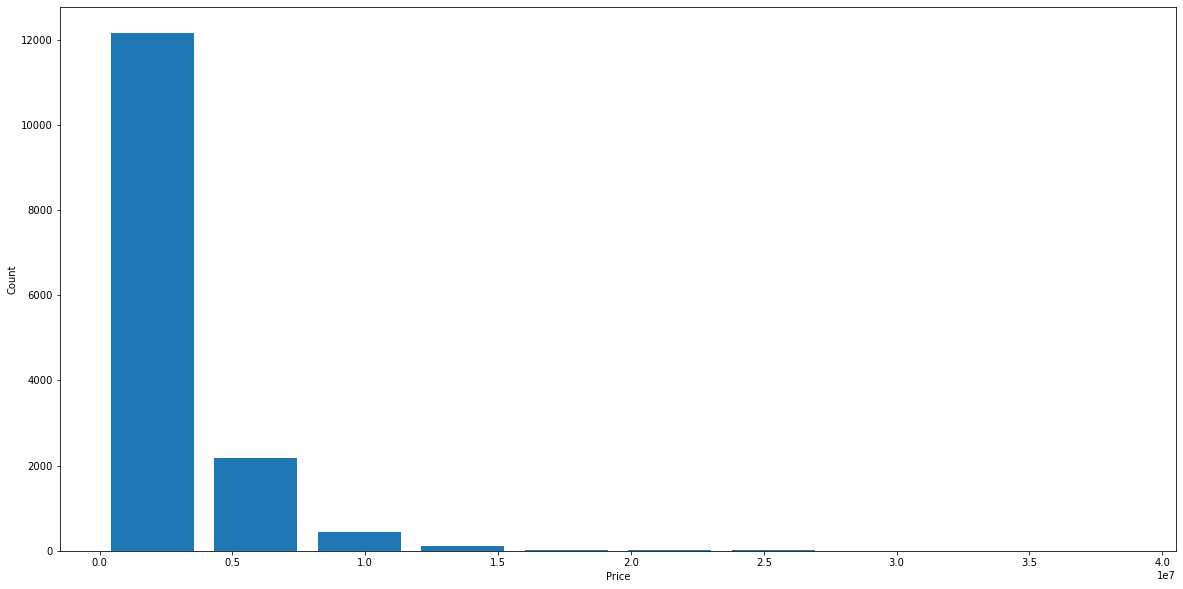

In [37]:
plt.hist(data.price, rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
    

## One-hot Encoding

In [41]:
dummies = pd.get_dummies(data.neighborhood)
dummies.head()

,JA,JP
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [43]:
data = pd.concat([data, dummies], axis=1)

In [44]:
data.head()

,area,rooms,suites,bathrooms,parkings,price,neighborhood,JA,JP
0,230.0,3,3,5,3,3790000.0,JA,1,0
1,85.0,2,1,2,1,1390000.0,JA,1,0
2,136.0,3,1,3,1,1590000.0,JA,1,0
3,136.0,3,1,4,1,1500000.0,JA,1,0
4,310.0,3,1,4,2,4150000.0,JA,1,0


In [46]:
data = data.drop('neighborhood', axis=1)

In [47]:
data.head()

,area,rooms,suites,bathrooms,parkings,price,JA,JP
0,230.0,3,3,5,3,3790000.0,1,0
1,85.0,2,1,2,1,1390000.0,1,0
2,136.0,3,1,3,1,1590000.0,1,0
3,136.0,3,1,4,1,1500000.0,1,0
4,310.0,3,1,4,2,4150000.0,1,0


In [48]:
data.shape

(14943, 8)

## Model Building

### Train test splitting

In [50]:
X = data.drop('price', axis=1)
X.head()

,area,rooms,suites,bathrooms,parkings,JA,JP
0,230.0,3,3,5,3,1,0
1,85.0,2,1,2,1,1,0
2,136.0,3,1,3,1,1,0
3,136.0,3,1,4,1,1,0
4,310.0,3,1,4,2,1,0


In [51]:
y = data.price
y.head()

0    3790000.0
1    1390000.0
2    1590000.0
3    1500000.0
4    4150000.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42 )

In [56]:
# train the model using linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7467300638272852

In [57]:
# lets use cross validation on linear regression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77865389, 0.74685715, 0.74118201, 0.76990613, 0.74663598])

In [62]:
## lets use Lasso and decisionTree for alternatives
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [71]:
# lets write a function for grid searchcv to select the best algorithm for our real estate problem

def find_best_model_using_gridsearchcv(X,y):
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
#       'random_forest':{
#             'model':RandomForestRegressor(),
#             'params': {
#                 'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#                 'max_features':['auto', 'sqrt'],
#                 'max_depth':max_depth,
#                 'criterion': ['mse', 'mae'],
#                 'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'bootstrap': [True, False]
                
#             }
#         }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [72]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.756647,{'normalize': True}
1,lasso,0.756647,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.887609,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [73]:
d_tree = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')

In [74]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [75]:
d_tree.score(X_test, y_test)

0.8838644322903512

In [76]:
data.columns

Index(['area', 'rooms', 'suites', 'bathrooms', 'parkings', 'price', 'JA',
       'JP'],
      dtype='object')

In [80]:
np.where(X.columns=='JP')[0][0]

6

In [83]:
## let's write a function to predict our price
def predict_price(neighborhood, area, rooms, suites, bathrooms, parkings):
    loc_index = np.where(X.columns==neighborhood)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = rooms
    x[2] = suites
    x[3] = bathrooms
    x[4] = parkings
    
    
    if loc_index >= 0:
        x[loc_index] = 1
    return d_tree.predict([x])[0]


In [87]:
predict_price('JA', 230, 3, 3, 5, 3)

3646692.3076923075

In [93]:
predict_price('JP', 140, 3, 1, 4, 1)

1457400.0

In [94]:
predict_price('JP', 140, 2, 2, 4, 3)

2500000.0

In [95]:
## lets export our model
import pickle
with open('real_estate_price_pred_model.pickle','wb') as f:
    pickle.dump(d_tree, f)

In [96]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
    
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))